In [1]:
from mp_api.client import MPRester
API_KEY = "4IeHY5jVcrgiKXNuAo6Jgs7yC0Z3hsli"
try:


    with MPRester(API_KEY) as mpr:
        # Query for Li-based cathode materials with high energy density
        docs = mpr.materials.insertion_electrodes.search(
            working_ion="Li",
            fields=[
                "battery_id", "formula_discharge", "average_voltage"
                , "energy_grav", "energy_vol", "capacity_grav", "capacity_vol", "stability_charge", "fracA_charge", "stability_charge", "max_delta_volume", "stability_discharge", "fracA_discharge"
            ]
        )

        # Convert to pandas for research analysis
        import pandas as pd
        df = pd.DataFrame([doc.dict() for doc in docs])
        print(df)

except Exception as e:
    print(f"An error occurred: {e}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving InsertionElectrodeDoc documents: 100%|██████████| 2774/2774 [00:00<00:00, 5596.76it/s]


        battery_id formula_discharge  max_delta_volume  average_voltage  \
0         mp-28_Li             Li3Ce          2.951183        -0.444846   
1       mp-2074_Li             Li3Sb          1.569237         1.015953   
2     mp-568806_Li              LiC6          0.025414         0.084405   
3     mp-573471_Li           Li22Sn5          0.009450        -0.362516   
4      mp-22902_Li              LiBi          0.368255         0.796796   
...            ...               ...               ...              ...   
2769  mp-770930_Li         Li2NbV3O8          0.042691         3.136507   
2770  mp-771133_Li      Li4Mn5Cr3O16          0.089148         3.893608   
2771  mp-771020_Li      Li4Co5Te3O16          0.184518         3.932885   
2772  mp-771093_Li     Li3Cr10Fe5O24          0.000458         4.820463   
2773  mp-771188_Li     Li8Mn13Fe3O32          0.040725         4.227074   

      capacity_grav  capacity_vol  energy_grav   energy_vol  fracA_charge  \
0        499.595769   

In [13]:
# Select only the numeric columns relevant to battery performance
cols_to_analyze = ['average_voltage', 'capacity_grav', 'energy_grav',
                    'max_delta_volume',
                   'fracA_charge', 'fracA_discharge', 'stability_charge', 'stability_discharge']

# Calculate the Pearson correlation
correlation_matrix = df[cols_to_analyze].corr()

"""max_delta_volume
average_voltage
capacity_grav
capacity_vol
energy_grav
energy_vol
fracA_charge
fracA_discharge
stability_charge
stability_discharge"""

correlation_matrix.head()

,average_voltage,capacity_grav,energy_grav,max_delta_volume,fracA_charge,fracA_discharge,stability_charge,stability_discharge
average_voltage,1.000000,0.005447,0.559847,-0.166604,-0.091733,-0.168156,0.104415,-0.158246
capacity_grav,0.005447,1.000000,0.682756,0.166922,-0.001666,0.617693,0.013842,-0.025702
energy_grav,0.559847,0.682756,1.000000,-0.078892,-0.083067,0.284575,0.105365,-0.091391
max_delta_volume,-0.166604,0.166922,-0.078892,1.000000,-0.043334,0.230252,-0.002720,0.142704
fracA_charge,-0.091733,-0.001666,-0.083067,-0.043334,1.000000,0.697934,-0.025491,-0.048233


In [14]:
df_clean = df[(df['stability_charge'] < 0.2) & (df['average_voltage'] > 0)]
correlation_clean = df_clean[cols_to_analyze].corr()

Reasons for filtering values:
*

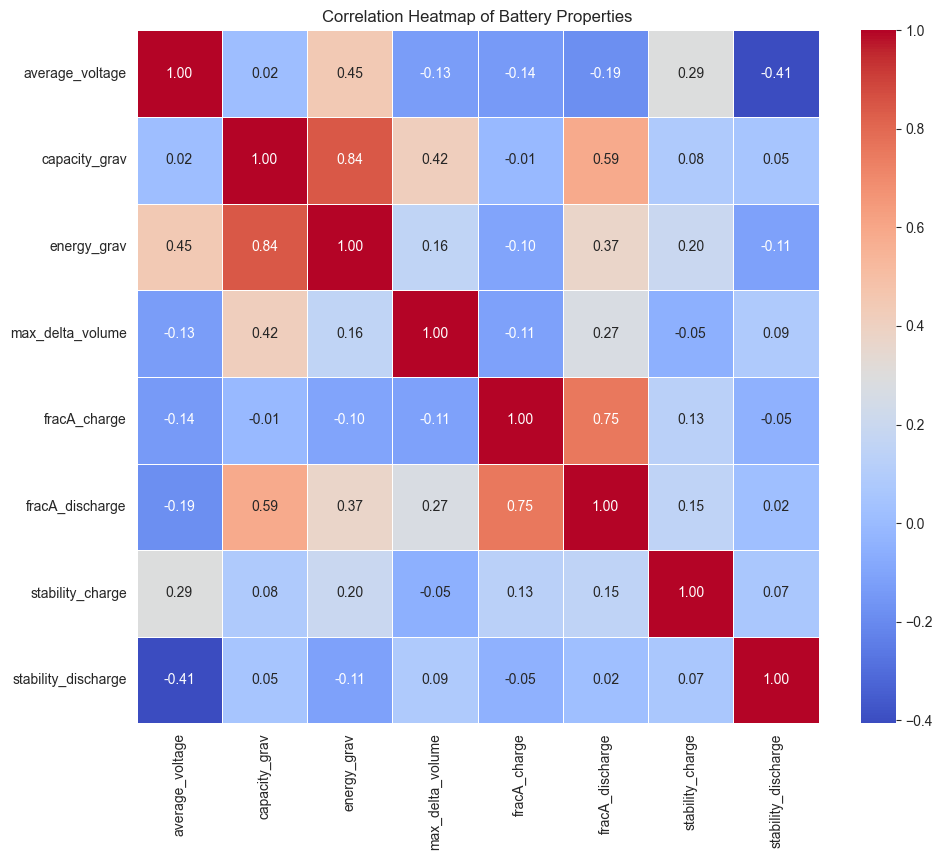

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_clean, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Battery Properties")
plt.show()

Note: filtering dataset slightly changes correlation results
Possible application: higher correlation will result in heavier weight

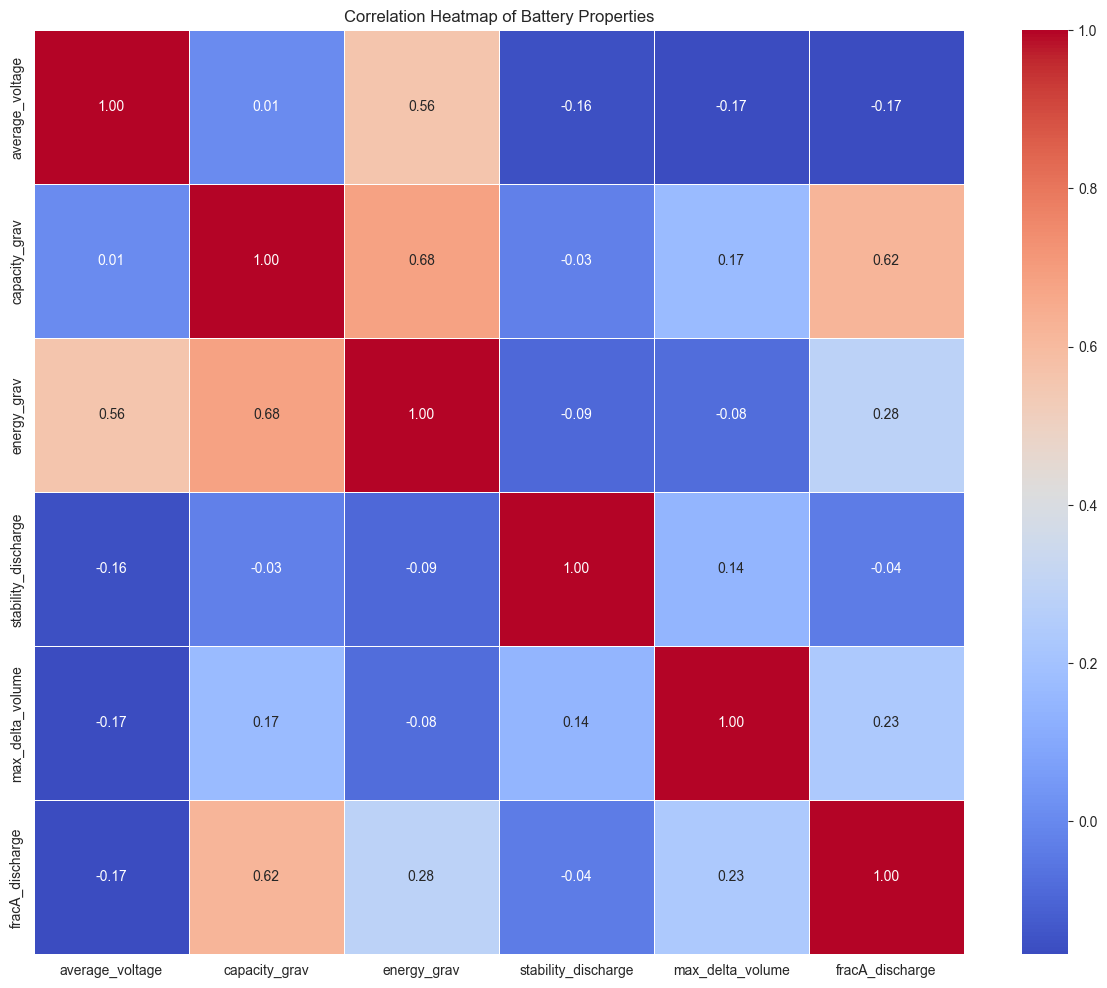

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Battery Properties")
plt.show()